In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import accuracy_score

In [2]:
ls

NNDL-HW1.pdf             data.txt                 madaline.ipynb
README.md                linear-perceptron.ipynb  perceptron.csv
adaline.ipynb            madaline.csv


In [3]:
df = pd.read_csv('madaline.csv', names=['x1', 'x2', 'y'])
df['y'] = df['y'].replace(0, -1)

In [4]:
print(df.shape)
df.head(3)

(200, 3)


,x1,x2,y
0,0.459694,-0.470583,-1.0
1,0.797385,-0.343030,-1.0
2,0.235270,0.961296,-1.0


<AxesSubplot:xlabel='x1', ylabel='x2'>

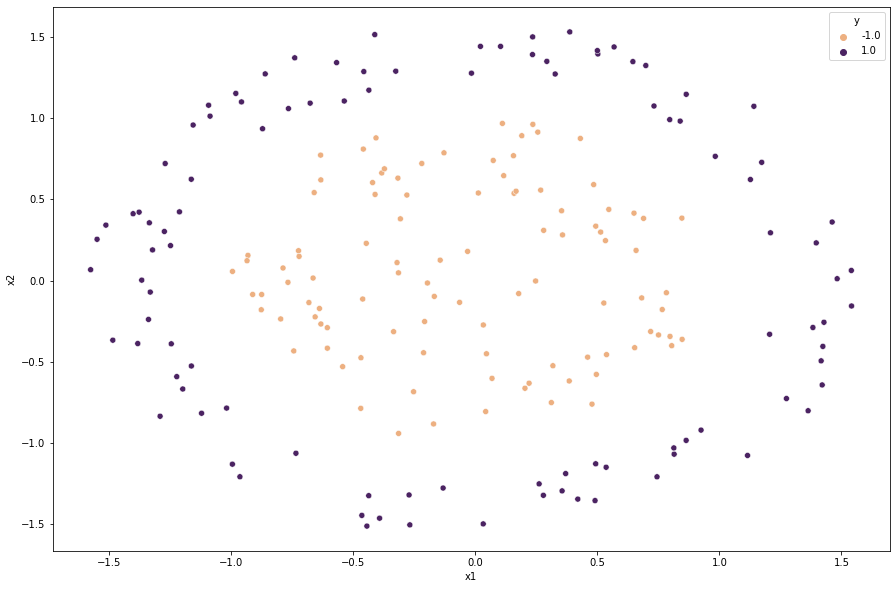

In [8]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='x1', y='x2', hue='y', palette='flare')

In [56]:
def forward_pass_hidden(inputs, W, B):
    net = np.dot(W, inputs) + B
    h = np.where(net >= 0, 1, -1)
    return net, h

In [96]:
def forward_pass_output(inputs):
    net = sum(inputs) + 3
    h = np.where(net >= 0, 1, -1)
    return net, h

In [97]:
def train_perceptron(X_train, y_train, max_epochs, n_neurons):

    y = np.empty_like(y_train)
    
    W = np.random.normal(0, 1, [n_neurons, X_train.shape[1]])
    B = np.random.normal(size=(n_neurons))
    lr = .01
    epochs = 0
    while True:
        errors = []
        epochs += 1
        for index in X_train.index:

            net_hidden, h_hidden = forward_pass_hidden(X_train.loc[index], W, B)

            net_output, h_output = forward_pass_output(h_hidden)

            
            y[index] = h_output
            if h_output == y_train.loc[index]:
                continue


            elif h_output == 1:
                for arg in range(n_neurons):
                    if net_hidden[arg] > 0:
                        W[arg] += lr * (-1 - net_hidden[arg]) * X_train.loc[index]
                        B[arg] += lr * (-1 - net_hidden[arg])
            elif h_output == -1:
                zz = abs(net_hidden)
                arg = np.argsort(zz)[0]
                W[arg] += lr * (1 - net_hidden[arg]) * X_train.loc[index]
                B[arg] += lr * (1 - net_hidden[arg])
        if epochs > max_epochs or all(y == y_train):
            break
        if epochs % 100 == 0:
            print('epoch: {}'.format(epochs))
    score = accuracy_score(y_train, y)
    return W, B, score, y

In [98]:
def plot_dividing_lines(x, y, ax, points):
    sns.scatterplot(data=points, x='x1', y='x2', alpha=0.8, hue='y', palette='flare', ax=ax)
    sns.lineplot(x=x, y=y, color='black', ax=ax)

In [99]:
def find_misclassifieds(W, X_train, y_train):
    misclassified_indices = []
    for index in X_train.index:
        net, h = forward_pass(X_train.loc[index], W)
        if h != y_train.loc[index]:
            misclassified_indices.append(index)
    return misclassified_indices

In [118]:
def draw_lines(W, B, df, score):
    fig = plt.figure(figsize=(15, 8))
    ax = plt.subplot(111)
    x1_min, x1_max = min(df['x1']), max(df['x1'])
    x = np.linspace(x1_min, x1_max, num=10000)
    for i in range(W.shape[0]):
        y = -(W[i][0]*x + B[i]) / W[i][1]
        plot_dividing_lines(x, y, ax, df)

    plot_dividing_lines(x, y, ax, df)
    plt.title('accuracy score {}'.format(score))
    ax.get_legend().remove()
    plt.ylim((-2, 2))

In [119]:
max_epochs = 1000
X_train = df[['x1', 'x2']]
y_train = df['y']

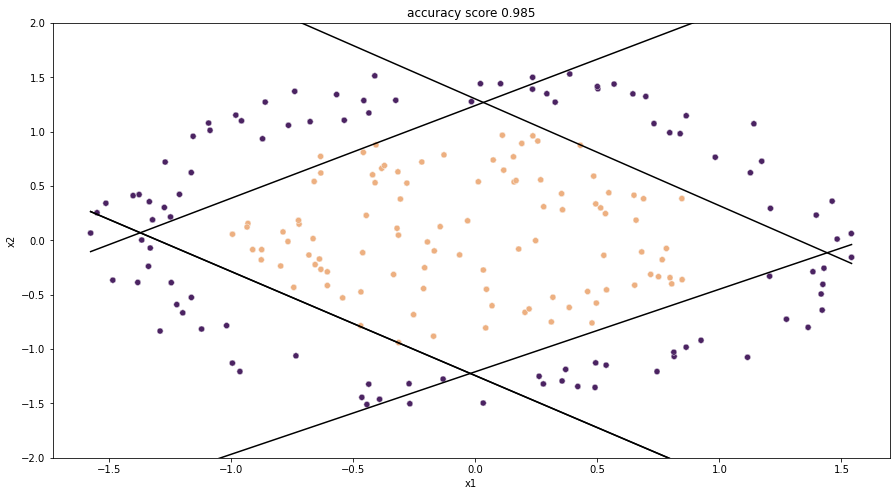

In [124]:
n_neurons = 4

W, B, score, y = train_perceptron(X_train, y_train, 1000, n_neurons)
draw_lines(W, B, df, score)

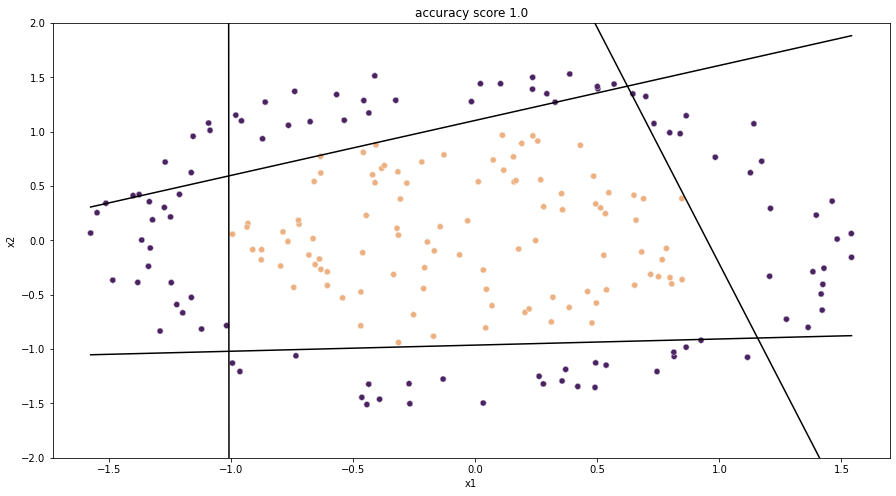

In [125]:
n_neurons = 6

W, B, score, y = train_perceptron(X_train, y_train, max_epochs, n_neurons)
draw_lines(W, B, df, score)

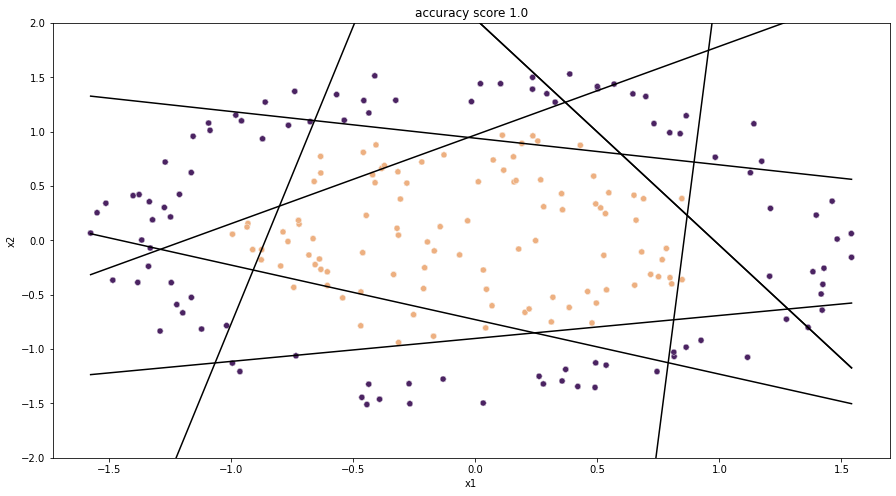

In [126]:
n_neurons = 8

W, B, score, y = train_perceptron(X_train, y_train, max_epochs, n_neurons)
draw_lines(W, B, df, score)